# Simple MNIST NN from scratch

In this notebook, We implemented a simple two-layer neural network and trained it on the MNIST digit recognizer dataset. It's meant to be an instructional example, through which you can understand the underlying math of neural networks better.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')

In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
X_train.shape
Y_train.shape

(41000,)

Our NN will have a simple two-layer architecture. Input layer $a^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer $a^{[1]}$ will have 10 units with ReLU activation, and finally our output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward propagation**

$$Z^{[1]} = W^{[1]} X$$
$$A^{[1]} = \text{ReLU}(Z^{[1]})$$
$$Z^{[2]} = W^{[2]} A^{[1]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: 785 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x 785 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[1]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10

In [ ]:
input_size = 785  #đầu vào là các ảnh 28x28 pixel
hidden_size1 = 128
hidden_size2 = 64
hidden_size3 = 32
output_size = 10  # đầu ra là các lớp của các chữ số từ 0-9

def init_params():
    W1 = np.random.rand(input_size, hidden_size1) - 0.5
    W2 = np.random.rand(hidden_size1, hidden_size2) - 0.5
    W3 = np.random.rand(hidden_size2, hidden_size3) - 0.5
    W4 = np.random.rand(hidden_size3, output_size) - 0.5
    return W1, W2, W3, W4

def pad(x):
    return np.concatenate((np.ones((1, x.shape[1]), dtype = x.dtype), x), axis=0)

def ReLU(Z):
    "YOUR CODE HERE"
    return np.maximum(0, Z)
    pass

def softmax(Z):
    "YOUR CODE HERE"
    return np.exp(Z)/sum(np.exp(Z))
    pass

def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def forward_prop(W1, W2, W3, W4, X):
    "YOUR CODE HERE"
    # you should replace these None value
    Z1 = np.dot(X, W1)
    A1 = ReLU(Z1)
    Z2 = np.dot(A1, W2)
    A2 = ReLU(Z2)
    Z3 = np.dot(A2, W3)
    A3 = ReLU(Z3)
    Z4 = np.dot(A3, W4)
    A4 = softmax(Z4.T)
    return Z1, A1, Z2, A2, Z3, A3, Z4, A4
    pass

def ReLU_deriv(Z):
  #đạo hàm reLu
    "YOUR CODE HERE"
    return Z > 0
    pass

def sigmoid_derivative(Z):
    return Z * (1 - Z)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, W1, W2, W3, W4, X, Y):
    one_hot_Y = one_hot(Y)
    "YOUR CODE HERE"
    # you should replace these None value
    dZ4 = A4 - one_hot_Y
    dW4 = np.dot(A3.T, dZ4.T) / m_train

    dA3 = np.dot(dZ4.T, W4.T)
    dZ3 = dA3 * ReLU_deriv(A3)
    dW3 = np.dot(A2.T, dZ3) / m_train

    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * ReLU_deriv(A2)
    dW2 = np.dot(A1.T, dZ2)/ m_train

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * ReLU_deriv(A1)
    dW1 = np.dot(X.T, dZ1)/ m_train

    return dW1, dW2, dW3, dW4


def update_params(W1, W2, W3, W4, dW1, dW2, dW3, dW4, alpha):
    W1 = W1 - alpha * dW1
    W2 = W2 - alpha * dW2
    W3 = W3 - alpha * dW3
    W4 = W4 - alpha * dW4
    return W1, W2, W3, W4

In [ ]:
def get_predictions(A4):
    return np.argmax(A4, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, W2, W3, W4 = init_params()
    for i in range(iterations):
        "YOUR CODE HERE"
        # you should replace these None value
        Z1, A1, Z2, A2, Z3, A3, Z4, A4 = forward_prop(W1, W2, W3, W4, X)
        dW1, dW2, dW3, dW4 = backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, W1, W2, W3, W4, X, Y)
        W1, W2, W3, W4 = update_params(W1, W2, W3, W4, dW1, dW2, dW3, dW4, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A4)
            print(get_accuracy(predictions, Y))
    return W1, W2, W3, W4

In [ ]:
W1, W2, W3, W4  = gradient_descent(pad(X_train).T, Y_train, 0.10, 3000)

Iteration:  0
[9 9 9 ... 1 9 9] [8 0 6 ... 1 6 6]
0.11095121951219512
Iteration:  10
[3 6 5 ... 8 6 0] [8 0 6 ... 1 6 6]
0.1943170731707317
Iteration:  20
[3 0 6 ... 3 2 2] [8 0 6 ... 1 6 6]
0.3645121951219512
Iteration:  30
[7 0 6 ... 1 2 2] [8 0 6 ... 1 6 6]
0.4678048780487805
Iteration:  40
[7 0 6 ... 1 2 6] [8 0 6 ... 1 6 6]
0.5718536585365853
Iteration:  50
[7 0 6 ... 1 2 6] [8 0 6 ... 1 6 6]
0.6269024390243902
Iteration:  60
[7 0 6 ... 1 6 6] [8 0 6 ... 1 6 6]
0.6676585365853659
Iteration:  70
[7 0 6 ... 1 6 6] [8 0 6 ... 1 6 6]
0.695170731707317
Iteration:  80
[7 0 6 ... 1 6 6] [8 0 6 ... 1 6 6]
0.7191463414634146
Iteration:  90
[4 0 6 ... 1 6 6] [8 0 6 ... 1 6 6]
0.7378780487804878
Iteration:  100
[4 0 6 ... 1 6 6] [8 0 6 ... 1 6 6]
0.7514878048780488
Iteration:  110
[4 0 6 ... 1 6 6] [8 0 6 ... 1 6 6]
0.7424634146341463
Iteration:  120
[4 0 6 ... 1 6 6] [8 0 6 ... 1 6 6]
0.7629512195121951
Iteration:  130
[4 0 6 ... 1 6 6] [8 0 6 ... 1 6 6]
0.7727317073170732
Iteration:  140
[

~85% accuracy on training set.

In [ ]:
def make_predictions(X, W1, W2, W3, W4):
    Z1, A1, Z2, A2, Z3, A3, Z4, A4 = forward_prop(W1, W2, W3, W4, X)
    predictions = get_predictions(A4)
    return predictions

def test_prediction(index, W1, W2, W3, W4):
    current_image = X_train[:, index, None]
    prediction = make_predictions(pad(X_train[:, index, None]).T, W1, W2, W3, W4)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at a couple of examples:

Prediction:  [8]
Label:  8


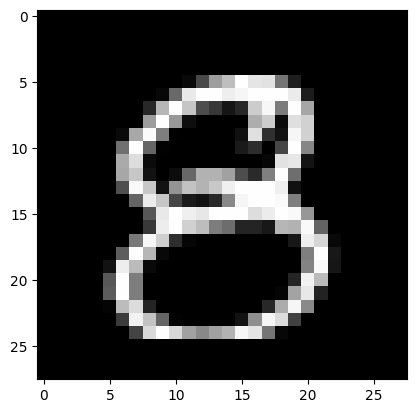

Prediction:  [0]
Label:  0


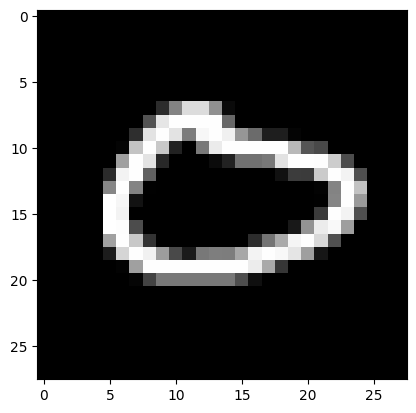

Prediction:  [6]
Label:  6


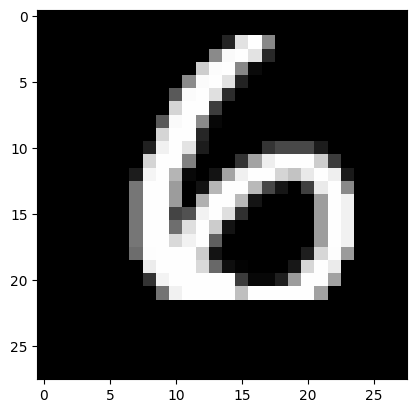

Prediction:  [4]
Label:  4


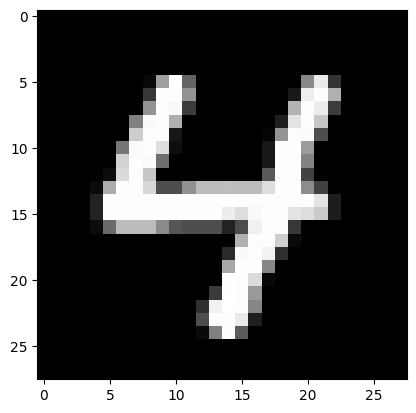

In [ ]:
test_prediction(0, W1, W2, W3, W4)
test_prediction(1, W1, W2, W3, W4)
test_prediction(2, W1, W2, W3, W4)
test_prediction(3, W1, W2, W3, W4)

Finally, let's find the accuracy on the dev set:

In [ ]:
dev_predictions = make_predictions(pad(X_dev).T, W1, W2, W3, W4)
get_accuracy(dev_predictions, Y_dev)

[5 6 6 4 0 3 4 6 8 4 9 1 3 6 7 4 8 9 6 2 1 0 2 2 5 2 4 9 9 6 5 7 6 2 5 3 2
 1 2 8 0 2 1 5 8 3 9 0 7 8 3 5 9 9 5 5 2 4 5 6 0 5 0 2 6 5 9 8 2 9 4 4 1 8
 6 8 0 8 0 7 2 6 9 4 4 9 8 7 1 6 4 4 3 1 9 5 1 2 1 7 9 7 0 8 5 1 6 4 4 5 6
 6 6 0 4 9 2 6 0 6 4 1 9 5 5 4 5 2 7 7 5 3 2 8 3 7 6 0 5 8 3 4 0 6 6 3 5 8
 9 8 0 0 3 3 1 4 3 3 0 1 0 8 1 3 3 1 1 0 5 4 3 3 5 0 0 1 4 7 9 7 6 2 5 8 9
 8 5 0 7 5 0 9 3 0 3 6 2 4 4 1 5 8 9 7 9 1 7 6 3 7 7 3 9 5 8 3 3 3 1 5 9 8
 0 9 9 4 3 3 1 8 6 6 1 2 3 6 0 4 9 9 3 7 8 2 0 4 9 2 5 3 0 4 4 7 8 0 0 1 0
 9 3 0 9 2 2 1 1 0 5 6 0 1 3 4 5 2 7 9 2 4 6 4 6 7 3 6 0 7 6 7 5 4 0 7 2 1
 3 0 1 5 3 8 5 0 2 9 9 8 8 0 2 2 6 2 1 0 2 9 3 7 7 2 3 0 5 2 6 0 8 1 7 1 0
 3 7 8 5 1 0 9 1 4 7 8 6 6 5 4 7 1 8 0 5 1 8 1 2 7 1 0 1 2 9 8 4 4 4 2 7 7
 8 7 5 9 8 2 4 7 3 1 9 8 6 1 0 6 9 8 6 3 6 7 5 0 0 1 4 5 4 0 1 1 1 4 2 6 1
 0 3 5 0 6 6 9 5 8 3 8 6 1 4 2 8 6 8 5 8 5 7 8 7 5 9 7 1 4 2 6 2 5 8 1 3 4
 2 8 9 5 3 5 6 3 7 3 8 2 1 7 8 1 9 1 5 3 2 6 6 6 5 8 3 8 0 6 7 8 1 6 1 6 7
 0 7 5 9 6 7 9 1 5 1 0 8 

0.941

Still 84% accuracy, so our model generalized from the training data pretty well.